In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [3]:
!wget $data -O churn_data.csv

--2023-10-01 17:55:39--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘churn_data.csv’

churn_data.csv      100%[===================>] 954.59K  3.21MB/s    in 0.3s    

2023-10-01 17:55:40 (3.21 MB/s) - ‘churn_data.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('churn_data.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
column_list = list(df.columns)
column_list

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [9]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [10]:
new_column_list = list(df.columns)
new_column_list

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

In [11]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [12]:
tc = pd.to_numeric(df.totalcharges, errors='coerce').isnull()

In [13]:
df[tc].isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [14]:
df.totalcharges = df.totalcharges.fillna(0)

In [15]:
df.churn = (df.churn == 'yes').astype(int) 

In [16]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

<h1>Validation Framework</h1>

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [19]:
len(df_full_train), len(df_test)

(5634, 1409)

In [20]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [21]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [24]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

<h1>EDA</h1>

In [25]:
df_full_train = df_full_train.reset_index(drop=True)

In [26]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.6,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.9,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.5,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.1,1


In [27]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [28]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [29]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [30]:
df_full_train.churn.mean()  

0.26996805111821087

In [31]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [32]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [33]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [34]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [35]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

<h1>Feature Importance: Mutual Information</h1>

In [36]:
from sklearn.metrics import mutual_info_score

In [37]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [38]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [39]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [40]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [41]:
df_full_train[categorical].apply(lambda series: mutual_info_score(series, df_full_train.churn))

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [42]:
mi = df_full_train[categorical].apply(lambda series: mutual_info_score(series, df_full_train.churn)).sort_values(ascending=False).to_frame(name='MI')

In [43]:
mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


<h1>Feature Importance: Correlaton</h1>

In [44]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [45]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.6
5630,60,19.95,1189.9
5631,28,105.70,2979.5
5632,2,54.40,114.1


In [46]:
df_full_train.tenure.max()

72

In [47]:
df_full_train[numerical].corrwith(df_full_train.churn)

/tmp/ipykernel_438070/1637209991.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_full_train[numerical].corrwith(df_full_train.churn)


tenure           -0.351885
monthlycharges    0.196805
dtype: float64

In [48]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [49]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [50]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [51]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [52]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.tenure <= 50)].churn.mean()

0.372438955936009

In [53]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

<h1>One-Hot Encoding</h1>

In [54]:
from sklearn.feature_extraction import DictVectorizer

In [55]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient='records') 

In [56]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [57]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': '8425.15'}

In [58]:
dv = DictVectorizer(sparse=False) 

In [59]:
x_train = dv.fit_transform(train_dicts)

In [60]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', ..., 'totalcharges=999.45',
       'totalcharges=999.9', 'totalcharges=_'], dtype=object)

In [61]:
x_train.shape

(4225, 4056)

In [62]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [63]:
x_val = dv.transform(val_dicts)

In [64]:
x_val.shape

(1409, 4056)

<h1>Logistic Regression</h1>

In [65]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [66]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [67]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

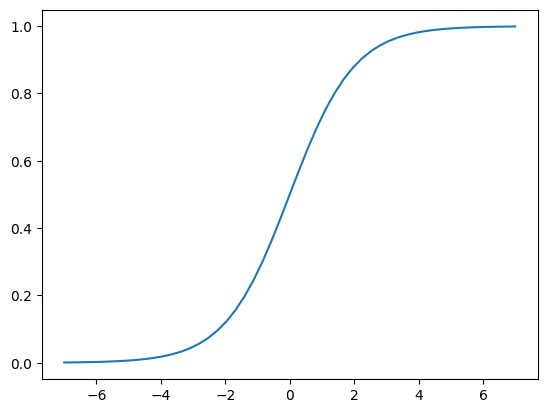

In [68]:
plt.plot(z, sigmoid(z))

In [69]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [70]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    
    return result

<h1>Logistic Regression w/Sklearn</h1>

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression()

In [73]:
model.fit(x_train, y_train)

/home/brandon/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
model.intercept_[0]

-0.19758385213794105

In [75]:
model.coef_[0].round(3)

array([ 0.925,  0.261, -1.366, ...,  0.038, -0.058, -0.09 ])

In [76]:
model.predict(x_train)

array([0, 1, 1, ..., 1, 0, 1])

In [77]:
y_pred = model.predict_proba(x_val)[:, 1]
y_pred >= 0.5

array([False, False, False, ..., False,  True,  True])

In [78]:
churn_decision = (y_pred >= 0.5)

In [79]:
churn_decision 

array([False, False, False, ..., False,  True,  True])

In [80]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 308, dtype: object

In [81]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [82]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [83]:
(y_val == churn_decision).mean()

0.8041163946061036

In [84]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual_value'] = y_val

In [85]:
df_pred

,probability,prediction,actual_value
0,0.005525,0,0
1,0.226830,0,0
2,0.213512,0,0
3,0.580158,1,1
4,0.213732,0,0
...,...,...,...
1404,0.395245,0,0
1405,0.067533,0,1
1406,0.129511,0,0
1407,0.812217,1,1


In [86]:
df_pred['correct'] = df_pred.prediction == df_pred.actual_value

In [87]:
df_pred 

,probability,prediction,actual_value,correct
0,0.005525,0,0,True
1,0.226830,0,0,True
2,0.213512,0,0,True
3,0.580158,1,1,True
4,0.213732,0,0,True
...,...,...,...,...
1404,0.395245,0,0,True
1405,0.067533,0,1,False
1406,0.129511,0,0,True
1407,0.812217,1,1,True


In [88]:
df_pred['correct'].mean()

0.8041163946061036

<h1>Model Interpretation</h1>

In [89]:
model.coef_[0].round(3)

array([ 0.925,  0.261, -1.366, ...,  0.038, -0.058, -0.09 ])

In [91]:
list(dv.get_feature_names_out())

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [92]:
zip(dv.get_feature_names_out(), model.coef_[0].round(3))

In [93]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

[('contract=month-to-month', 0.925),
 ('contract=one_year', 0.261),
 ('contract=two_year', -1.366),
 ('dependents=no', -0.115),
 ('dependents=yes', -0.065),
 ('deviceprotection=no', -0.002),
 ('deviceprotection=no_internet_service', -0.12),
 ('deviceprotection=yes', -0.059),
 ('gender=female', -0.085),
 ('gender=male', -0.095),
 ('internetservice=dsl', -0.495),
 ('internetservice=fiber_optic', 0.434),
 ('internetservice=no', -0.12),
 ('monthlycharges', 0.002),
 ('multiplelines=no', -0.245),
 ('multiplelines=no_phone_service', 0.038),
 ('multiplelines=yes', 0.027),
 ('onlinebackup=no', 0.031),
 ('onlinebackup=no_internet_service', -0.12),
 ('onlinebackup=yes', -0.092),
 ('onlinesecurity=no', 0.141),
 ('onlinesecurity=no_internet_service', -0.12),
 ('onlinesecurity=yes', -0.202),
 ('paperlessbilling=no', -0.317),
 ('paperlessbilling=yes', 0.137),
 ('partner=no', -0.166),
 ('partner=yes', -0.014),
 ('paymentmethod=bank_transfer_(automatic)', -0.168),
 ('paymentmethod=credit_card_(automati

In [94]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.925,
 'contract=one_year': 0.261,
 'contract=two_year': -1.366,
 'dependents=no': -0.115,
 'dependents=yes': -0.065,
 'deviceprotection=no': -0.002,
 'deviceprotection=no_internet_service': -0.12,
 'deviceprotection=yes': -0.059,
 'gender=female': -0.085,
 'gender=male': -0.095,
 'internetservice=dsl': -0.495,
 'internetservice=fiber_optic': 0.434,
 'internetservice=no': -0.12,
 'monthlycharges': 0.002,
 'multiplelines=no': -0.245,
 'multiplelines=no_phone_service': 0.038,
 'multiplelines=yes': 0.027,
 'onlinebackup=no': 0.031,
 'onlinebackup=no_internet_service': -0.12,
 'onlinebackup=yes': -0.092,
 'onlinesecurity=no': 0.141,
 'onlinesecurity=no_internet_service': -0.12,
 'onlinesecurity=yes': -0.202,
 'paperlessbilling=no': -0.317,
 'paperlessbilling=yes': 0.137,
 'partner=no': -0.166,
 'partner=yes': -0.014,
 'paymentmethod=bank_transfer_(automatic)': -0.168,
 'paymentmethod=credit_card_(automatic)': -0.138,
 'paymentmethod=electronic_check': 0.122,
 '

In [95]:
small = ['contract', 'tenure', 'monthlycharges']

In [96]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [98]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [101]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [102]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [103]:
X_train_small = dv_small.transform(dicts_train_small)

In [104]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [105]:
model_small.intercept_[0]

-2.476775662927698

In [106]:
model_small.coef_[0].round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [107]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [112]:
sigmoid(-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036))

0.41824062315816374

In [113]:
-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036)

-0.3300000000000001

In [114]:
sigmoid(_)

0.41824062315816374

In [115]:
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

-3.473

In [116]:
sigmoid(_)

0.030090303318277657

<h1>Using the Model</h1>

In [117]:
df_full_train 

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.6,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.9,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.5,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.1,1


In [118]:
dicts_df_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [119]:
dicts_df_full_train[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'two_year',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check',
 'tenure': 12,
 'monthlycharges': 19.7,
 'totalcharges': '258.35'}

In [120]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_df_full_train)

In [121]:
y_full_train = df_full_train.churn.values

In [122]:
model = LogisticRegression().fit(X_full_train, y_full_train)

/home/brandon/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [124]:
X_full_test = dv.transform(dicts_test)

In [125]:
y_pred = model.predict_proba(X_full_test)[:, 1]

In [128]:
churn_decision = (y_pred >= 0.5)

In [129]:
(churn_decision == y_test).mean()

0.8105039034776437

In [130]:
dicts_test[10]

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': '2861.45'}

In [131]:
customer = dicts_test[10]
customer 

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': '2861.45'}

In [133]:
X_small = dv.transform([customer])

In [134]:
X_small.shape

(1, 5335)

In [136]:
model.predict_proba(X_small)[0, 1]

0.5240707575163382